# **Airbnb Listings & Reviews Analysis**

Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

**Objective 1:**

Profile & QA the data

**Objective 2:**

Produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

**Objective 3:**

Build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

# *1.Data Model*

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
listings = pd.read_csv("Listings.csv", encoding='latin1')
print(listings)

        listing_id                                               name  \
0           281420     Beautiful Flat in le Village Montmartre, Paris   
1          3705183                    39 mÃÂ² Paris (Sacre CÃâur)   
2          4082273                Lovely apartment with Terrace, 60m2   
3          4797344                Cosy studio (close to Eiffel tower)   
4          4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms   
...            ...                                                ...   
279707    38338635  Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...   
279708    38538692                          Cozy Studio in Montmartre   
279709    38683356            Nice and cosy mini-appartement in Paris   
279710    39659000  Charming apartment near Rue Saint Maur / Oberk...   
279711    40219504        Cosy apartment with view on Canal St Martin   

         host_id  host_since                 host_location host_response_time  \
0        1466919  2011-12-03  Paris, Ile-d

In [3]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listings.shape

(279712, 33)

In [5]:
listings.tail()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279711,40219504,Cosy apartment with view on Canal St Martin,6955618,2013-06-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [7]:
df_sample = pd.read_csv("Listings.csv", encoding='latin1', nrows=7, parse_dates=["host_since"])
print(df_sample.dtypes)

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                    float64
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count               int64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                              float64
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                                int64
amenities                         

In [8]:
filtered_df = listings[listings['city'].str.lower() == 'paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
filtered_df

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [11]:
#using query
paris_listings= listings.query("city == 'Paris'").loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
paris_listings

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [12]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_since     64657 non-null  object
 1   neighbourhood  64690 non-null  object
 2   city           64690 non-null  object
 3   accommodates   64690 non-null  int64 
 4   price          64690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


In [13]:
paris_listings.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
279707    False
279708    False
279709    False
279710    False
279711     True
Length: 64690, dtype: bool

In [14]:
paris_listings.duplicated().sum()

2113

In [15]:
paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [16]:
paris_listings.describe(include='all')

,host_since,neighbourhood,city,accommodates,price
count,64657,64690,64690,64690.000000,64690.000000
unique,3854,20,1,NaN,NaN
top,2019-09-02,Buttes-Montmartre,Paris,NaN,NaN
freq,634,7237,64690,NaN,NaN
mean,NaN,NaN,NaN,3.037997,113.096445
std,NaN,NaN,NaN,1.588766,214.433668
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,2.000000,59.000000
50%,NaN,NaN,NaN,2.000000,80.000000
75%,NaN,NaN,NaN,4.000000,120.000000


# **2.Preparation for Visualization**

In [17]:
paris_listings_neighbourhood= paris_listings.query("city == 'Paris'").loc[:, ["neighbourhood"]]
paris_listings_neighbourhood

,neighbourhood
0,Buttes-Montmartre
1,Buttes-Montmartre
2,Elysee
3,Vaugirard
4,Passy
...,...
279707,Observatoire
279708,Buttes-Montmartre
279709,Buttes-Montmartre
279710,Popincourt


In [18]:
paris_listings_neighbourhood  = paris_listings.groupby('neighbourhood')['price'].mean().sort_values()
paris_listings_neighbourhood.head()

neighbourhood
Menilmontant         74.942257
Buttes-Chaumont      82.690182
Buttes-Montmartre    87.209479
Reuilly              89.058402
Popincourt           90.559459
Name: price, dtype: float64

In [27]:
paris_listings_accomodations= paris_listings.groupby('accommodates')['price'].mean().sort_values()
paris_listings_accomodations

accommodates
0       0.000000
1      64.847055
2      84.070550
3      98.231924
4     125.990255
5     165.160757
6     217.147059
7     261.065957
8     324.770308
9     381.900000
10    585.756219
16    677.060606
11    680.911765
14    699.230769
13    704.578947
12    817.389610
15    928.416667
Name: price, dtype: float64

In [31]:
paris_listings_over_time = (
    paris_listings.set_index("host_since").resample("Y").agg({"neighbourhood": "count", "price": "mean"})
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# **3.Data Visualization & summarize findings**

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

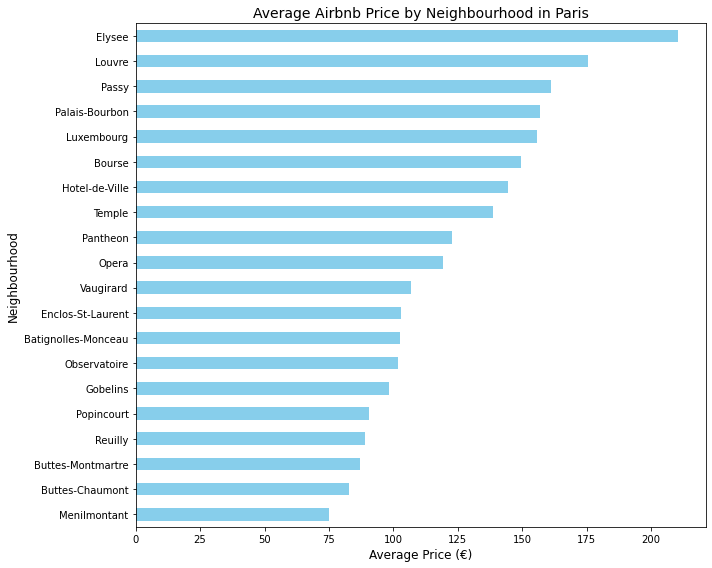

In [33]:
plt.figure(figsize=(10, 8))
paris_listings_neighbourhood.plot(kind='barh', color='skyblue')

plt.title('Average Airbnb Price by Neighbourhood in Paris', fontsize=14)
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.tight_layout()
plt.show()

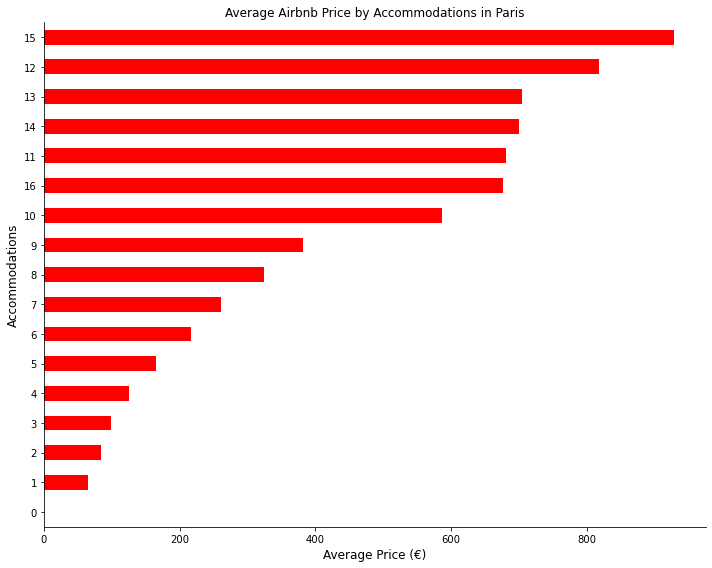

In [63]:
plt.figure(figsize=(10, 8))
paris_listings_accomodations.plot(kind='barh', color='red')
plt.title('Average Airbnb Price by Accommodations in Paris', fontsize=12)
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Accommodations', fontsize=12)
plt.tight_layout()
sns.despine()

# Show the plot
plt.show()

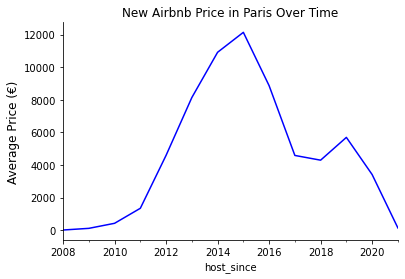

In [64]:
paris_listings_over_time['neighbourhood'].plot(color='blue')
plt.title('New Airbnb Price in Paris Over Time')
plt.ylabel('Average Price (€)', fontsize=12)
sns.despine()

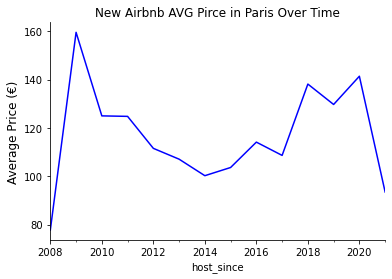

In [67]:
paris_listings_over_time['price'].plot(color='blue')
plt.title('New Airbnb AVG Price in Paris Over Time')
plt.ylabel('Average Price (€)', fontsize=12)
sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

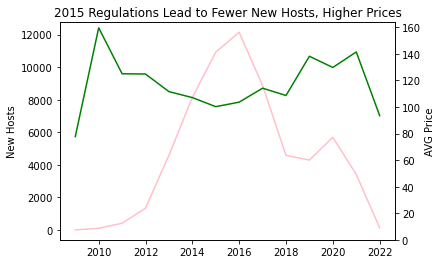

In [78]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
        paris_listings_over_time.index,
        paris_listings_over_time['neighbourhood'],
        label='New Host',
        c='pink'
)

ax.set_ylabel('New Hosts')

ax2 = ax.twinx()

ax2.plot(
        paris_listings_over_time.index,
        paris_listings_over_time['price'],
        label='AVG Price',
        c='green'
)

ax2.set_ylim(0)

ax2.set_ylabel('AVG Price')

ax.set_title('2015 Regulations Lead to Fewer New Hosts, Higher Prices')

In [82]:
#BONUS: Create a dual axis line chart to show both new hosts and average price over time
paris_listings.groupby('neighbourhood')['price'].mean().idxmax()

'Elysee'